In [17]:
import sys
sys.path.append('/home/rrg0013@auburn.edu/git/nodules/src/')

import candidates as cd
import candgen as luna
import segutil as util

import os
import math
import copy
import time
import scipy
import random
import skimage.feature
import scipy.ndimage
import scipy.misc as scipy_misc
import scipy.ndimage.morphology as morphology
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import SimpleITK as sitk

from glob import glob
from skimage import measure
from skimage import feature

SAMPLES_PATH = '/scr/data/nodules/luna/train/subset7/'
SAMPLE_CANDIDATES_PATH = '/home/rrg0013@auburn.edu/git/nodules/resources/annotations.csv'

## Generate list of files:

In [19]:
time1 = time.time()
#for parent, subdir, files in os.walk(SAMPLES_PATH):
path = SAMPLES_PATH
filelist = glob(path+'/*.mhd')
filepathlist = copy.deepcopy(filelist)
templist = []
for f in filelist:
  f = f.split('/')
  f = f[-1]
  templist.append(f[:-4])
filelist = templist

In [244]:
# bin1
for n, f in enumerate(filelist):
  if f == '1.3.6.1.4.1.14519.5.2.1.6279.6001.655242448149322898770987310561':
    print n
  if f == '1.3.6.1.4.1.14519.5.2.1.6279.6001.861997885565255340442123234170':
    print n
  if f == '1.3.6.1.4.1.14519.5.2.1.6279.6001.674809958213117379592437424616':
    print n 
  if f == '1.3.6.1.4.1.14519.5.2.1.6279.6001.756684168227383088294595834066':
    print n
  if f == '1.3.6.1.4.1.14519.5.2.1.6279.6001.226456162308124493341905600418':
    print n
  if f == '1.3.6.1.4.1.14519.5.2.1.6279.6001.169128136262002764211589185953':
    print n
  if f == '1.3.6.1.4.1.14519.5.2.1.6279.6001.325164338773720548739146851679':
    print n
  if f == '1.3.6.1.4.1.14519.5.2.1.6279.6001.306948744223170422945185006551':
    print n
  if f == '1.3.6.1.4.1.14519.5.2.1.6279.6001.935683764293840351008008793409':
    print n


8
11
12
14
63
65
80
84
88


In [79]:
# bin2
for n, f in enumerate(filelist):
  if f == '1.3.6.1.4.1.14519.5.2.1.6279.6001.133378195429627807109985347209':
    print n
  #SHOULD BE REMOVED FROM SEGMENTATION TRAINING DATA
  if f == '1.3.6.1.4.1.14519.5.2.1.6279.6001.144883090372691745980459537053':
    print n

8
26


In [198]:
# bin3
for n, f in enumerate(filelist):
  if f == '1.3.6.1.4.1.14519.5.2.1.6279.6001.199670099218798685977406484591':
    print n
  if f == '1.3.6.1.4.1.14519.5.2.1.6279.6001.244204120220889433826451158706':
    print n
  if f == '1.3.6.1.4.1.14519.5.2.1.6279.6001.254254303842550572473665729969':
    print n
  if f == '1.3.6.1.4.1.14519.5.2.1.6279.6001.275007193025729362844652516689':
    print n
  if f == '1.3.6.1.4.1.14519.5.2.1.6279.6001.277662902666135640561346462196':
    print n
  if f == '1.3.6.1.4.1.14519.5.2.1.6279.6001.481278873893653517789960724156':
    print n
  if f == '1.3.6.1.4.1.14519.5.2.1.6279.6001.842317928015463083368074520378':
    print n
  if f == '1.3.6.1.4.1.14519.5.2.1.6279.6001.961063442349005937536597225349':
    print n
  if f == '1.3.6.1.4.1.14519.5.2.1.6279.6001.970428941353693253759289796610':
    print n
  if f == '1.3.6.1.4.1.14519.5.2.1.6279.6001.975426625618184773401026809852':
    print n

6
7
25
45
49
50
63
68
82
87


In [91]:
# bin4
for n, f in enumerate(filelist):
  if f == '1.3.6.1.4.1.14519.5.2.1.6279.6001.161855583909753609742728521805':
    print n
  if f == '1.3.6.1.4.1.14519.5.2.1.6279.6001.242761658169703141430370511586':
    print n
  if f == '1.3.6.1.4.1.14519.5.2.1.6279.6001.897684031374557757145405000951':
    print n
  if f == '1.3.6.1.4.1.14519.5.2.1.6279.6001.211051626197585058967163339846':
    print n
  if f == '1.3.6.1.4.1.14519.5.2.1.6279.6001.228511122591230092662900221600':
    print n

13
35
51
56
59


In [125]:
# bin5
for n, f in enumerate(filelist):
  if f == '1.3.6.1.4.1.14519.5.2.1.6279.6001.110678335949765929063942738609':
    print n
  if f == '1.3.6.1.4.1.14519.5.2.1.6279.6001.111258527162678142285870245028':
    print n
  if f == '1.3.6.1.4.1.14519.5.2.1.6279.6001.112740418331256326754121315800':
    print n
  if f == '1.3.6.1.4.1.14519.5.2.1.6279.6001.138904664700896606480369521124':
    print n
  if f == '1.3.6.1.4.1.14519.5.2.1.6279.6001.176638348958425792989125209419':
    print n

15
17
41
46
49


In [7]:
# bin6
for n, f in enumerate(filelist):
  if f == '1.3.6.1.4.1.14519.5.2.1.6279.6001.315187221221054114974341475212':
    print n
  if f == '1.3.6.1.4.1.14519.5.2.1.6279.6001.316900421002460665752357657094':
    print n
  if f == '1.3.6.1.4.1.14519.5.2.1.6279.6001.316911475886263032009840828684':
    print n
  if f == '1.3.6.1.4.1.14519.5.2.1.6279.6001.321935195060268166151738328001':
    print n
  if f == '1.3.6.1.4.1.14519.5.2.1.6279.6001.330544495001617450666819906758':
    print n
  if f == '1.3.6.1.4.1.14519.5.2.1.6279.6001.658611160253017715059194304729':
    print n

61
63
64
65
68
82


In [20]:
#bin7
for n, f in enumerate(filelist):
  if f == '1.3.6.1.4.1.14519.5.2.1.6279.6001.113679818447732724990336702075':
    print n
  if f == '1.3.6.1.4.1.14519.5.2.1.6279.6001.122621219961396951727742490470':
    print n
  if f == '1.3.6.1.4.1.14519.5.2.1.6279.6001.215640837032688688030770057224':
    print n
  if f == '1.3.6.1.4.1.14519.5.2.1.6279.6001.613212850444255764524630781782':
    print n

3
7
29
76


## Select file from list and print nodules from annotations file:

In [42]:
no = 29
print filelist[no]
candlist = pd.read_csv(SAMPLE_CANDIDATES_PATH)
currentNodules = candlist[candlist['seriesuid'] == filelist[no]]
print currentNodules[['coordX','coordY','coordZ','diameter_mm']]

1.3.6.1.4.1.14519.5.2.1.6279.6001.215640837032688688030770057224
        coordX     coordY      coordZ  diameter_mm
468  78.465534  44.036288  -86.868586     5.696771
469  96.276465 -23.556863 -107.373361     7.477745
470  72.190529  33.772830 -115.449769     6.569504
471  63.787940 -77.600633 -143.298137     4.983856
472  87.579324   9.783753 -100.932488     9.088191
473 -86.839032  51.571196 -143.711497     5.181247


## Initial read image:

In [43]:
itk = sitk.ReadImage(filepathlist[no])
origin = np.array(itk.GetOrigin())
spacing = np.array(itk.GetSpacing())

## Get coordinates for nodule number nno:

In [47]:
nno = 5
cx = currentNodules['coordX']
cx = cx.as_matrix()
cy = currentNodules['coordY']
cy = cy.as_matrix()
cz = currentNodules['coordZ']
cz = cz.as_matrix()
tcx = cx[nno]
tcy = cy[nno]
tcz = cz[nno]
center = np.asarray([tcx,tcy,tcz])
#newCenter = (center-origin)/spacing
coords = abs(center-origin)
#coords = center-origin
coords = np.round(coords).astype(int)
print coords
#print newCenter

[ 46 198 171]


## Get diameter and approximate volume for nodule number nno:

In [11]:
di = currentNodules['diameter_mm']
di = di.as_matrix()
d = di[nno]
volume = 3.14159265359*(d*d*d/8)*4/3.

In [45]:
image, _ = luna.loadItk(filepathlist[no],None)

In [13]:
print image.shape

(300, 366, 366)


In [274]:
#tmp = sitk.GetArrayFromImage(_)
#print tmp.shape

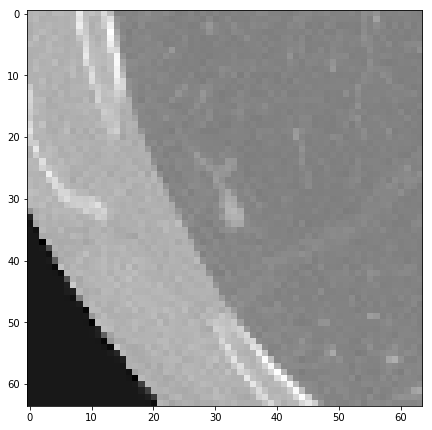

In [48]:
plt.figure(figsize=(16,16))
plt.subplot(221)
plt.imshow(image[coords[2],abs(coords[1])-32:abs(coords[1])+32,abs(coords[0])-32:abs(coords[0])+32],cmap='gray')
#plt.subplot(222)
#plt.imshow(tmp[49,196:260,335:399],cmap='gray')
plt.show()

In [280]:
fname = '/home/g/Desktop/git/nodules/out/bin6.28.0.png'
scipy.misc.toimage(image[coords[2],abs(coords[1])-32:abs(coords[1])+32,abs(coords[0])-32:abs(coords[0])+32],cmin=-1000,cmax=1000).save(fname)

In [214]:
def segmentLung(image, fill=True, reseg=False, error=False):
  print 'SEGMENTING LUNG VOLUME ..'
  binaryImage = np.array(image > -550, dtype=np.int8)+1
  labels = measure.label(binaryImage)
  backgroundLabel = labels[0,0,0]
  if error:
    binaryImage[backgroundLabel == labels] = 1
  else:
    binaryImage[backgroundLabel == labels] = 2
  if fill:
    for i, axialSlice in enumerate(binaryImage):
      axialSlice = axialSlice - 1
      labeling = measure.label(axialSlice, background=0)
      lmax = cd.largestLabel(labeling, bg=0)
      if lmax is not None: 
        binaryImage[i][labeling != lmax] = 1
  binaryImage -= 1
  binaryImage = 1-binaryImage
  labels = measure.label(binaryImage, background=0)
  lmax = cd.largestLabel(labels, bg=0)
  if reseg:
    binaryImage[labels==0] = 0
    binaryImage[labels==lmax] = 0
  elif lmax is not None:
    binaryImage[labels != lmax] = 0
  return binaryImage

In [215]:
def checkSeg(seg): 
  shape = seg.shape
  x,y,z = shape[0],shape[1],shape[2]
  if seg[0,0,0]==0 and seg[x-1,0,0]==0 and seg[0,y-1,0]==0 and seg[0,0,z-1]==0\
     and seg[x-1,y-1,0]==0 and seg[x-1,0,z-1]==0 and seg[0,y-1,z-1]==0 and seg[x-1,y-1,z-1]==0:
    return False
  else:
    return True

In [216]:
segmentation = segmentLung(image,reseg=False)
if checkSeg(segmentation): segmentation = segmentLung(image,reseg=True)
mask = cd.applyMask(image, segmentation)
segmentedImage = copy.deepcopy(image)
#minimum = np.min(image)
segmentedImage[mask==0] = 0#minimum

SEGMENTING LUNG VOLUME ..
APPLYING MASK


In [217]:
binaryImage = np.array(image > -550, dtype=np.int8)+1
labels = measure.label(binaryImage, background=0)
backgroundLabel = labels[0,0,0]
print backgroundLabel
print binaryImage[150,200,200]
binaryImage[backgroundLabel == labels] = 1

1
1


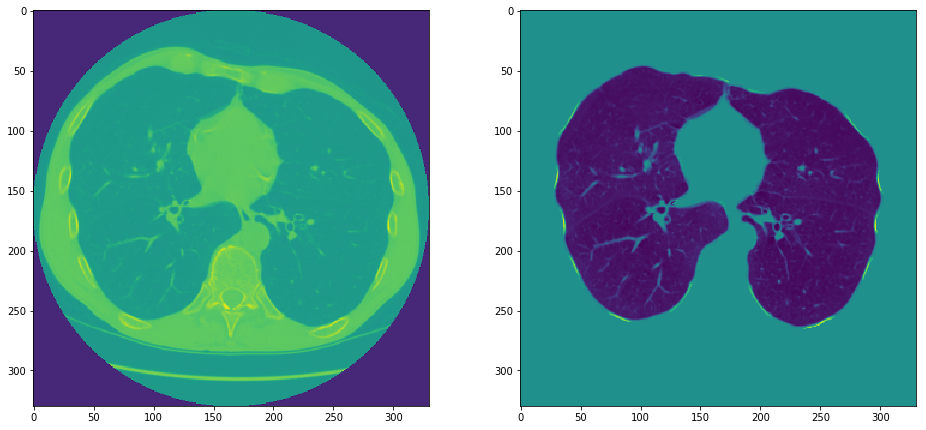

In [218]:
plt.figure(figsize=(16,16))
plt.subplot(221)
plt.imshow(image[150,:,:])
#plt.subplot(222)
#plt.imshow(binaryImage[150,:,:])
plt.subplot(222)
plt.imshow(segmentedImage[150,:,:])
plt.show()

In [151]:
zmin,zmax,ymin,ymax,xmin,xmax = cd.findROI(segmentedImage)
roi = cd.crop(segmentedImage)
roiCoords = coords-(xmin,ymin,zmin)

In [152]:
if roi.shape[0]<100 or roi.shape[1]<100 or roi.shape[2]<100:
  segmentation = segmentLung(image, error=True)
  mask = cd.applyMask(image, segmentation)
  segmentedImage = copy.deepcopy(image)
  segmentedImage[mask==0] = 0
  zmin,zmax,ymin,ymax,xmin,xmax = cd.findROI(segmentedImage)
  roi = cd.crop(segmentedImage)

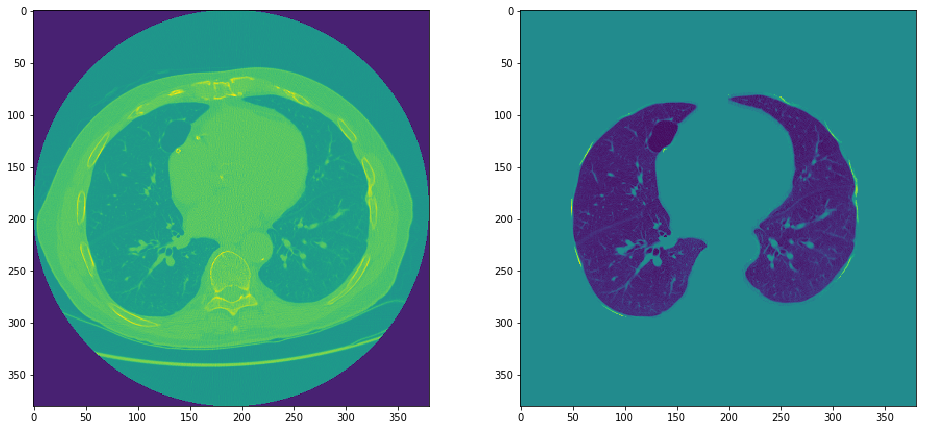

In [153]:
plt.figure(figsize=(16,16))
plt.subplot(221)
plt.imshow(image[150,:,:])
#plt.subplot(222)
#plt.imshow(binaryImage[150,:,:])
plt.subplot(222)
plt.imshow(segmentedImage[150,:,:])
plt.show()

In [154]:
print segmentedImage.shape[0]

335


In [155]:
t1 = time.time()
cands = cd.filterHessian(cd.multiscaleHessian(roi))
t2 = time.time()
print t2-t1

COMPUTING HESSIANS FOR ALL GUASSIANS
GETTING GAUSSIAN SCALES
COMPUTING APPROX HESSIAN
COMPUTING APPROX HESSIAN
COMPUTING APPROX HESSIAN
COMPUTING APPROX HESSIAN
COMPUTING APPROX HESSIAN
COMPUTING APPROX HESSIAN
FILTERING HESSIAN VALUES
GETTING GAUSSIAN SCALES
HESSIAN NO: 0
  SLICE: 0/287
  SLICE: 50/287
  SLICE: 100/287
  SLICE: 150/287
  SLICE: 200/287
  SLICE: 250/287
TIME: 426.365126133
HESSIAN NO: 1
  SLICE: 0/287
  SLICE: 50/287
  SLICE: 100/287
  SLICE: 150/287
  SLICE: 200/287
  SLICE: 250/287
TIME: 422.540068865
HESSIAN NO: 2
  SLICE: 0/287
  SLICE: 50/287
  SLICE: 100/287
  SLICE: 150/287
  SLICE: 200/287
  SLICE: 250/287
TIME: 403.3439219
HESSIAN NO: 3
  SLICE: 0/287
  SLICE: 50/287
  SLICE: 100/287
  SLICE: 150/287
  SLICE: 200/287
  SLICE: 250/287
TIME: 413.265407085
HESSIAN NO: 4
  SLICE: 0/287
  SLICE: 50/287
  SLICE: 100/287
  SLICE: 150/287
  SLICE: 200/287
  SLICE: 250/287
TIME: 431.385863066
HESSIAN NO: 5
  SLICE: 0/287
  SLICE: 50/287
  SLICE: 100/287
  SLICE: 150/28

In [156]:
copycands = copy.deepcopy(cands)

In [174]:
cands = copy.deepcopy(copycands)
maskROI = mask[zmin:zmax,ymin:ymax,xmin:xmax]
cands[maskROI==0] = 0

In [175]:
t1 = time.time()
cands = cd.optVolumeThresholding(cands,mn=45,mx=20000)
t2 = time.time()
print t2-t1

OPTIMIZED VOLUME THRESHOLDING
4.0091779232


In [176]:
labels = measure.label(cands,connectivity=1)
print np.max(labels)

904


In [177]:
copyroi = copy.deepcopy(roi)
roi[cands==1] = 500

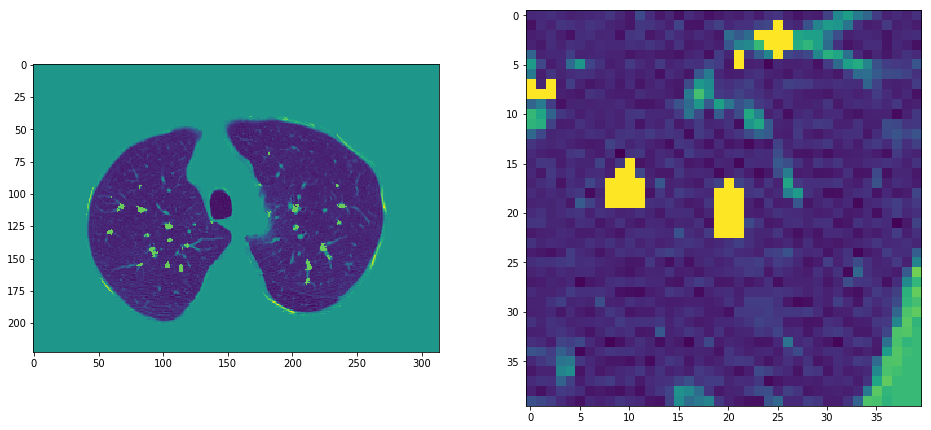

In [178]:
plt.figure(figsize=(16,16))
plt.subplot(221)
plt.imshow(roi[roiCoords[2],:,:])
plt.subplot(222)
plt.imshow(roi[roiCoords[2],roiCoords[1]-20:roiCoords[1]+20,roiCoords[0]-20:roiCoords[0]+20])
plt.show()

## Functions for writing candidates: 

In [179]:
def showCand(image,c3,c2,c1):
  plt.figure(figsize=(16,16))
  plt.subplot(221)
  image[c1,c2,c3] = 1000
  plt.imshow(image[c1,c2-32:c2+32,c3-32:c3+32])
  plt.show()
def showCandSimple(image):
  plt.figure(figsize=(16,16))
  plt.subplot(221)
  image[32,32,32] = 1000
  plt.imshow(image[32,:,:])
  plt.show()

In [180]:
def writeCand(roi,uid,outpath,coords,nodule=False):
  c1,c2,c3 = coords
  bb = np.zeros((512,512))
  for i in range(8):
    for j in range(8):
      bb[i*64:(i+1)*64,j*64:(j+1)*64] = roi[i*8+j,:,:]
  if nodule:
    fname = 't_'+str(c1)+'_'+str(c2)+'_'+str(c3)+'_'+str(uid)+'.png'
  else:
    fname = 'f_'+str(c1)+'_'+str(c2)+'_'+str(c3)+'_'+str(uid)+'.png'
  if not os.path.exists(outpath): os.makedirs(outpath)
  fname = outpath + '/' + fname
  scipy.misc.toimage(bb[:,:],cmin=-1000,cmax=1000).save(fname)


def generateCandidates(image, labels, coords, shift, com, outpath, seriesuid):
  cands = []
  noLabels = np.max(labels)
  for coord in coords:
    coord = coord-shift
    c3,c2,c1 = coord
    l = labels[c1,c2,c3]
    if l == 0:
      l = labels[c1+1,c2,c3]
      if l == 0:
        l = labels[c1,c2+1,c3]
        if l == 0:
          l = labels[c1,c2,c3+1]
          if l == 0:
            l = labels[c1-1,c2,c3]
            if l == 0:
              l = labels[c1,c2-1,c3]
              if l == 0:
                l = labels[c1,c2,c3-1]
                if l == 0:
                  print "NO CANDIDATE FOUND"
                  coord = coord + shift
                  coord = coord[::-1]
                  c1,c2,c3 = coord
                  roi = image[c1-32:c1+32,c2-32:c2+32,c3-32:c3+32]
                  writeCand(roi,seriesuid,outpath,coord,True)
                  continue
    cands.append(l)
    actualcom = np.round(com[l-1]).astype(int) + (shift[2],shift[1],shift[0])
    c1,c2,c3 = actualcom
    coord = coord + shift
    coord = coord[::-1]
    dc = np.array(actualcom-coord)
    dc = np.sqrt(np.sum(np.multiply(dc,dc)))
    roi = image[c1-32:c1+32,c2-32:c2+32,c3-32:c3+32]
    if roi.shape == (64,64,64):
      writeCand(roi,seriesuid,outpath,actualcom,True)
    if dc >= 3:
      c1,c2,c3 = coord
      roi = image[c1-32:c1+32,c2-32:c2+32,c3-32:c3+32]
      writeCand(roi,seriesuid,outpath,coord,True)    
  for i in range(0,100):
    r = random.randint(1,noLabels)
    while r in cands:
      r = random.randint(1,noLabels)
    actualcom = np.round(com[r-1]).astype(int) + (shift[2],shift[1],shift[0])
    c1,c2,c3 = actualcom
    roi = image[c1-32:c1+32,c2-32:c2+32,c3-32:c3+32]
    if roi.shape == (64,64,64):
      writeCand(roi,seriesuid,outpath,actualcom,False)
  return 0


def getCurrentNodulesCoords(nodules, origin):
  cx = nodules['coordX']
  cx = cx.as_matrix()
  cy = nodules['coordY']
  cy = cy.as_matrix()
  cz = nodules['coordZ']
  cz = cz.as_matrix()
  coords = []
  for i in range(cx.shape[0]):
    tcx = cx[i]
    tcy = cy[i]
    tcz = cz[i]
    center = np.asarray([tcx,tcy,tcz])
    tcoords = center-origin
    tcoords = np.round(tcoords).astype(int)
    print tcoords
    coords.append(tcoords)
  return coords

In [181]:
outpath = '/scr/nodules/luna16/temp/'
coords = getCurrentNodulesCoords(currentNodules, origin)
labels = measure.label(cands,connectivity=1)
com = scipy.ndimage.measurements.center_of_mass(labels,labels,list(range(1,np.max(labels)+1)))
generateCandidates(segmentedImage, labels, coords, (xmin,ymin,zmin), com, outpath, filelist[no])

[221 216 303]
[296 225 208]
[ 93 242  96]
[246 171 259]
[118 257 255]
[142 234 265]
[331 196 125]
NO CANDIDATE FOUND


0

In [182]:
troi = roi[roiCoords[2]-20:roiCoords[2]+20,roiCoords[1]-20:roiCoords[1]+20,roiCoords[0]-20:roiCoords[0]+20]
#troi[troi>300] == 300
tcands = cands[roiCoords[2]-20:roiCoords[2]+20,roiCoords[1]-20:roiCoords[1]+20,roiCoords[0]-20:roiCoords[0]+20]
labels = measure.label(tcands,connectivity=1)
val = labels[19,19,19]
if val == 0:
  val = labels[20,20,20]
  if val == 0:
    val = labels[19,20,20]
    if val == 0:
      val = labels[20,19,20]
      if val == 0:
        val = labels[20,20,19]
        if val == 0:
          val = labels[20,19,19]
          if val == 0:
            val = labels[19,20,19]
            if val == 0:
              val = labels[19,19,20]
labels[labels!=val] = 0
labels[labels==val] = 1
nodulesCOM = scipy.ndimage.measurements.center_of_mass(tcands, labels)
print nodulesCOM
tcoords = np.round(np.array(nodulesCOM)).astype(int)
print tcoords
troi[tcoords[2],tcoords[1],tcoords[0]] = 1000

(20.040816326530614, 19.959183673469386, 19.979591836734695)
[20 20 20]


In [183]:
t1 = time.time()
#labels = measure.label(tcands,connectivity=1)
noduleCOM = scipy.ndimage.measurements.center_of_mass(labels, labels,list(range(1,np.max(labels)+1)))
#print noduleCOM
print len(noduleCOM)
t2 = time.time()
print str(t2-t1)

1
0.0033597946167


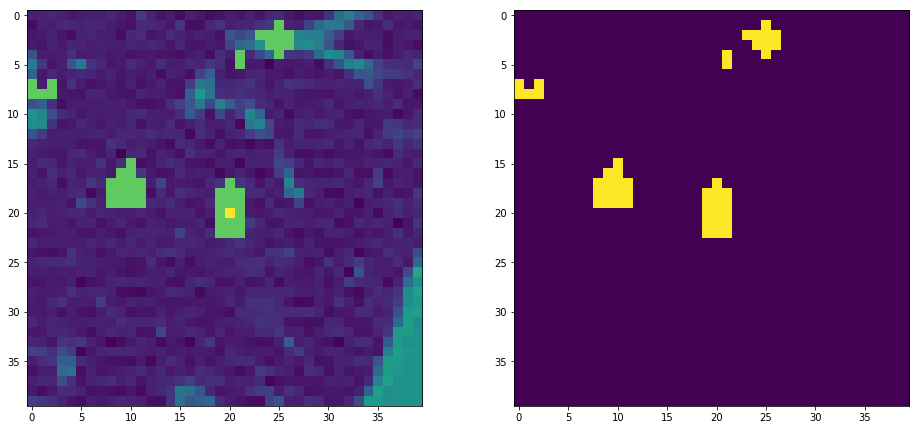

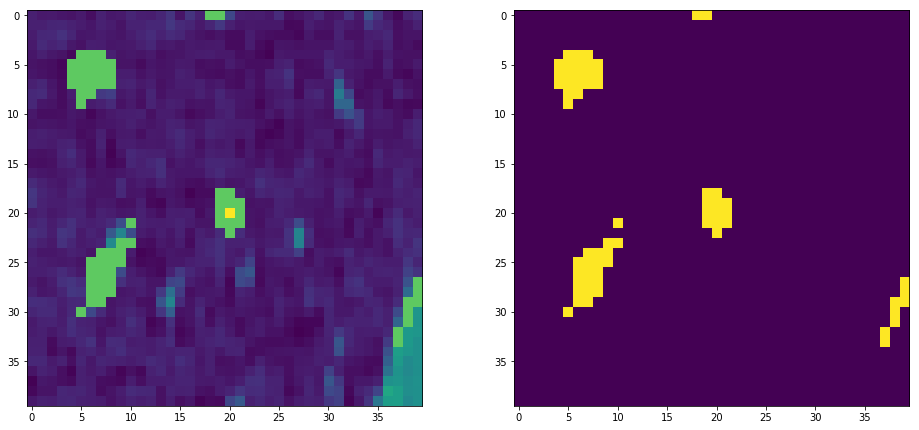

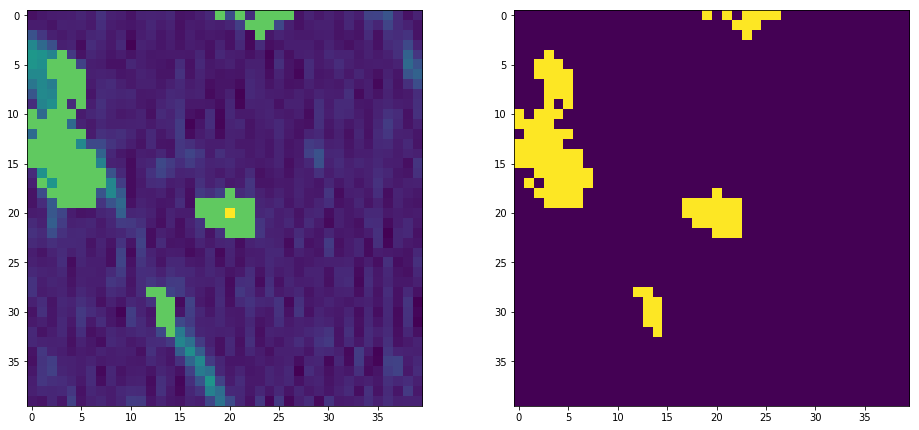

In [184]:
plt.figure(figsize=(16,16))
plt.subplot(222)
plt.imshow(tcands[tcoords[2],:,:])
plt.subplot(221)
plt.imshow(troi[tcoords[2],:,:])
plt.show()
plt.figure(figsize=(16,16))
plt.subplot(222)
plt.imshow(tcands[:,tcoords[1],:])
plt.subplot(221)
plt.imshow(troi[:,tcoords[1],:])
plt.show()
plt.figure(figsize=(16,16))
plt.subplot(222)
plt.imshow(tcands[:,:,tcoords[0]])
plt.subplot(221)
plt.imshow(troi[:,:,tcoords[0]])
plt.show()

Segmentation volume: 49
Approximate actual volume: 29.0309621457


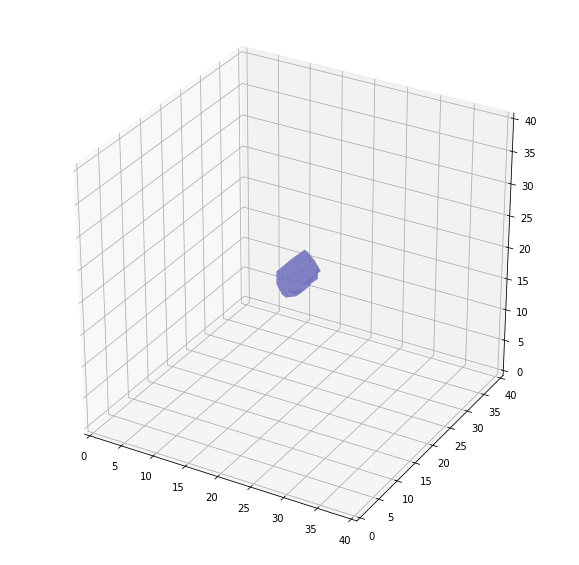

In [185]:
segmentationVolume = np.sum(labels)
print "Segmentation volume: " + str(segmentationVolume)
print "Approximate actual volume: " + str(volume)
cd.plot3d(labels,0)

In [186]:
time2 = time.time()
print "TOTAL TIME: " + str(time2-time1)

TOTAL TIME: 7625.02590513


# Low Density Nodule Filter - LDN filter

In [187]:
def getProps(labels,oldImage):
  t1 = time.time()
  label = np.zeros(labels.shape)
  intensities = np.zeros((np.max(labels),7))
  for i in range(1,np.max(labels)):
    if i%250 == 0:
      t2 = time.time()
      print str(i) + " CANDIDATES COMPUTED " + str(t2-t1) + 's' 
    label *= 0
    label = np.where(labels==i,1,0)
    props = measure.regionprops(label, oldImage)
    mx_i = props[0].max_intensity
    mean_i = props[0].mean_intensity
    mn_i = props[0].min_intensity
    irange = abs(mn_i-mx_i)
    intensities[i-1,6] = irange
    intensities[i-1,0] = mx_i
    intensities[i-1,1] = mean_i
    di = abs(mx_i-mean_i)
    intensities[i-1,2] = di
    area = props[0].area
    intensities[i-1,3] = area
    bbox = props[0].bbox
    du = bbox[3]-bbox[0]
    dv = bbox[4]-bbox[1]
    dw = bbox[5]-bbox[2]
    bbox_area = du*dv*dw
    bbox_ratio = float(area)/float(bbox_area)
    intensities[i-1,4] = bbox_area
    intensities[i-1,5] = bbox_ratio
  t2 = time.time()
  return intensities

In [188]:
cands = copy.deepcopy(copycands)
roi = copy.deepcopy(copyroi)
labels = measure.label(cands,connectivity=1)
#props = measure.regionprops(labels,roi)
val = labels[roiCoords[2],roiCoords[1],roiCoords[0]]
print val

37553


In [189]:
print np.max(labels)

43253


In [190]:
props = getProps(labels,roi)
print props[val-1]

250 CANDIDATES COMPUTED 40.9397890568s
500 CANDIDATES COMPUTED 82.7768139839s
750 CANDIDATES COMPUTED 125.044772148s
1000 CANDIDATES COMPUTED 168.295080185s
1250 CANDIDATES COMPUTED 209.608182192s


KeyboardInterrupt: 

In [70]:
fprops = copy.deepcopy(props)
fprops[props[:,3] < 50] = 0
fprops[props[:,1] > -500] = 0
fprops[props[:,6] > 600] = 0 

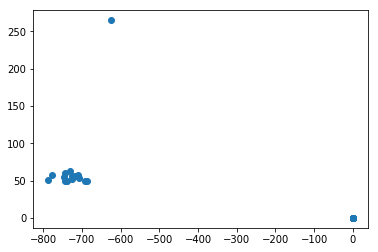

In [92]:
plt.figure()
plt.plot(fprops[:,1],fprops[:,3],"o")
plt.show()
plt.clf()

In [72]:
count = np.zeros(props.shape[0])
count[fprops[:,3]>0] = 1
print np.sum(count)

15.0


In [73]:
print fprops.shape[0]

41676


In [74]:
lnos = []
for i in range(fprops.shape[0]):
  if fprops[i,3] > 0:
    lnos.append(i)

In [75]:
print len(lnos)

15


In [76]:
print lnos

[8735, 13953, 14193, 14525, 14772, 15154, 16519, 18238, 23897, 24908, 26002, 26932, 28443, 29467, 29505]


In [90]:
newfp = np.zeros((len(lnos),11))
label = np.zeros(labels.shape)
for i in range(len(lnos)):
  newfp[i,:-4] = fprops[lnos[i]]
  label *= 0
  label = np.where(labels==lnos[i]+1,1,0)  
  props = measure.regionprops(label, roi)
  label = np.where(label>0,roi,0)
  vals = np.extract(label<0,label)
  newfp[i,-4] = scipy.stats.iqr(vals)
  newfp[i,-2] = np.percentile(vals,10.)
  newfp[i,-1] = np.percentile(vals,90.)
  newfp[i,-3] = abs(float(newfp[i,-2]-newfp[i,-1]))
  #print vals
print newfp

[[ -4.93000000e+02  -7.10551724e+02   2.17551724e+02   5.80000000e+01
    2.80000000e+02   2.07142857e-01   4.51000000e+02   1.96250000e+02
    3.46800000e+02  -8.71500000e+02  -5.24700000e+02]
 [ -4.98000000e+02  -7.44380000e+02   2.46380000e+02   5.00000000e+01
    1.40000000e+02   3.57142857e-01   4.32000000e+02   1.46000000e+02
    2.62500000e+02  -8.58500000e+02  -5.96000000e+02]
 [ -3.54000000e+02  -6.25977358e+02   2.71977358e+02   2.65000000e+02
    1.08000000e+03   2.45370370e-01   5.46000000e+02   1.37000000e+02
    2.64200000e+02  -7.54600000e+02  -4.90400000e+02]
 [ -5.07000000e+02  -7.18053571e+02   2.11053571e+02   5.60000000e+01
    2.24000000e+02   2.50000000e-01   5.15000000e+02   1.89000000e+02
    3.23000000e+02  -8.78500000e+02  -5.55500000e+02]
 [ -4.63000000e+02  -6.93180000e+02   2.30180000e+02   5.00000000e+01
    2.80000000e+02   1.78571429e-01   5.28000000e+02   1.39500000e+02
    2.37700000e+02  -8.00600000e+02  -5.62900000e+02]
 [ -4.20000000e+02  -7.2471153

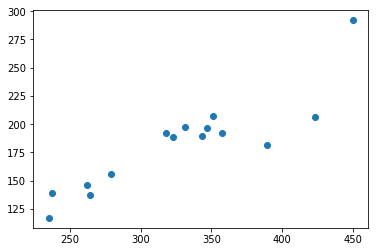

In [96]:
plt.figure()
plt.plot(newfp[:,-3],newfp[:,-4],"o")
plt.show()
plt.clf()